In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from logistic_regression import LogisticRegressor
from density_estimation import gen_cb, DensityEstimator

## Problem 2: Logistic Regression (two-class & multi-class classification task)

### Titanic dataset
**Self-implemented model on Titanic dataset**

In [2]:
trainset = np.loadtxt('data/titanic_train.csv', delimiter=',')
testset = np.loadtxt('data/titanic_test.csv', delimiter=',')
train_data, train_labels = trainset[:,:-1], trainset[:,-1]
test_data, test_labels = testset[:,:-1], testset[:,-1]


In [3]:
clf = LogisticRegressor(max_iter=int(1e4), lr=5e-2)
clf.fit(train_data, train_labels)

/Users/jack/git-projects/course-projects/ua-ece523-machine-learning/hw2/logistic_regression.py:55: RuntimeWarning: divide by zero encountered in log
  self.loss = - np.mean(y*np.log(p) + (1-y)*np.log(1-p))
/Users/jack/git-projects/course-projects/ua-ece523-machine-learning/hw2/logistic_regression.py:55: RuntimeWarning: invalid value encountered in multiply
  self.loss = - np.mean(y*np.log(p) + (1-y)*np.log(1-p))


In [35]:
predict = clf.predict(test_data)

In [36]:
# accuracy
metrics.accuracy_score(test_labels, predict)

0.7777777777777778

**Built-in model in scikit-learn on Titanic dataset**

In [37]:
clf = LogisticRegression()
clf.fit(train_data, train_labels)
predict = clf.predict(test_data)
metrics.accuracy_score(test_labels, predict)

0.7709750566893424

### Bank dataset

**self-implmented model on Bank dataset**

In [38]:
trainset = np.loadtxt('data/bank_train.csv', delimiter=',')
testset = np.loadtxt('data/bank_test.csv', delimiter=',')
train_data, train_labels = trainset[:,:-1], trainset[:,-1]
test_data, test_labels = testset[:,:-1], testset[:,-1]
print(train_data.shape, test_data.shape)

(3616, 16) (905, 16)


In [39]:
clf = LogisticRegressor(max_iter=int(1e4), lr=5e-2)
clf.fit(train_data, train_labels)
predict = clf.predict(test_data)

e:\Git-Projects\arizona-ece-course\ML\ml-hw-2\logistic_regression.py:60: RuntimeWarning: divide by zero encountered in log
  self.loss = - np.mean(y*np.log(p) + (1-y)*np.log(1-p))
e:\Git-Projects\arizona-ece-course\ML\ml-hw-2\logistic_regression.py:60: RuntimeWarning: invalid value encountered in multiply
  self.loss = - np.mean(y*np.log(p) + (1-y)*np.log(1-p))


In [40]:
## accuracy
acc1 = metrics.accuracy_score(test_labels, predict)
m1 = metrics.confusion_matrix(test_labels, predict)
print(acc1)
print(m1)

0.8519337016574585
[[750  57]
 [ 77  21]]


**built-in model of scikit-learn on Bank dataset**

In [41]:
clf = LogisticRegression()
clf.fit(train_data, train_labels)
predict = clf.predict(test_data)

In [42]:
# accuracy with built-in model
acc2 = metrics.accuracy_score(test_labels, predict)
m2 = metrics.confusion_matrix(test_labels, predict)
print(acc2)
print(m2)

0.9038674033149171
[[791  16]
 [ 71  27]]


## Problem 3: Density Estimation

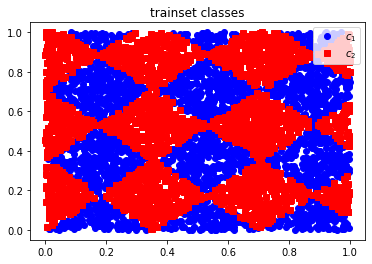

In [43]:
N = 5000
X, y = gen_cb(N, 0.25, np.pi/4)
plt.plot(X[np.where(y == 1)[0], 0], X[np.where(y == 1)[0], 1], 'o', c='b', label='$c_1$')
plt.plot(X[np.where(y == 2)[0], 0], X[np.where(y == 2)[0], 1], 's', c='r', label='$c_2$')
plt.legend(loc='upper right')
plt.title('trainset classes')
plt.show()

In [45]:
# fit
estr = DensityEstimator()
estr.fit(X, y)

# predict
X1 = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))
X1 = np.vstack([X1[0].ravel(), X1[1].ravel()]).T
p = estr.predict(X1)

In [46]:
p1 = p[:,0].reshape(100,100)
p2 = p[:,1].reshape(100,100)

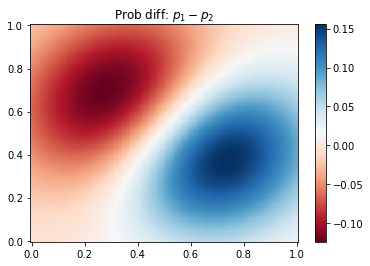

In [47]:
plt.pcolor(np.linspace(0,1,100),np.linspace(0,1,100), p1-p2, cmap=plt.cm.RdBu)
plt.colorbar()
plt.title('Prob diff: $p_1 - p_2$')
plt.show()

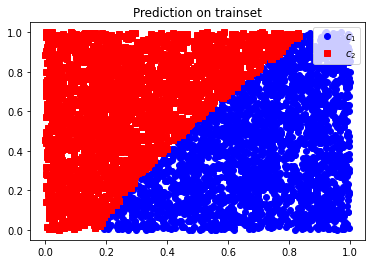

In [48]:
# e.g. calssification effect on the trainset
yh = estr.predict(X, label=True)
plt.plot(X[np.where(yh == 1)[0], 0], X[np.where(yh == 1)[0], 1], 'o', c='b', label='$c_1$')
plt.plot(X[np.where(yh == 2)[0], 0], X[np.where(yh == 2)[0], 1], 's', c='r', label='$c_2$')
plt.legend(loc='upper right')
plt.title('Prediction on trainset')
plt.show()